<a href="https://colab.research.google.com/github/kylehoffpauir/colab_example/blob/master/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://elitedatascience.com/python-seaborn-tutorial#step-10 
Converted the above article into a notebook

Importing Libraries and Dataset

Let’s start by importing Pandas, which is a great library for managing relational (i.e. table-format) datasets:
we’ll import Matplotlib, which will help us customize our plots further.

    Tip: In Jupyter Notebook, you can also include %matplotlib inline to display your plots inside your notebook.
we’ll import the Seaborn library, which is the star of today’s show.

In [4]:
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

Now we’re ready to import our dataset.

    Tip: we gave each of our imported libraries an alias. Later, we can invoke Pandas with pd, Matplotlib with plt, and Seaborn with sns.

Today, we’ll be using a cool Pokémon dataset (first generation).

Once you’ve downloaded the CSV file, you can import it with Pandas.

    Tip: The argument index_col=0 simply means we’ll treat the first column of the dataset as the ID column. The encoding= argument specifies the codec for the file.

In [5]:
url = 'https://raw.githubusercontent.com/kylehoffpauir/colab_example/master/Pokemon.csv'
# Read dataset
df = pd.read_csv(url, index_col=0, encoding='latin')

In [6]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Seaborn’s Plotting Functions

One of Seaborn’s greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.

There are two ways you can do so.

    The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.
    The second way is to directly pass in Series of data to the axes arguments.

For example, let’s compare the Attack and Defense stats for our Pokémon:

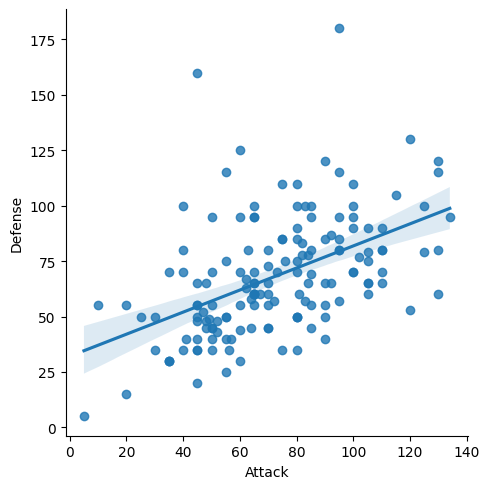

In [7]:
sns.lmplot(x='Attack', y='Defense', data=df)

*Side Note: If your plot looks different (e.g. has a white background), it’s simply due to your Seaborn package using a different theme/style. See Step 6: Seaborn Themes to learn how to change it.

By the way, Seaborn doesn’t have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn’s function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here’s how we can tweak the lmplot():

    First, we’ll set fit_reg=False to remove the regression line, since we only want a scatter plot.
    Then, we’ll set hue='Stage' to color our points by the Pokémon’s evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.
    

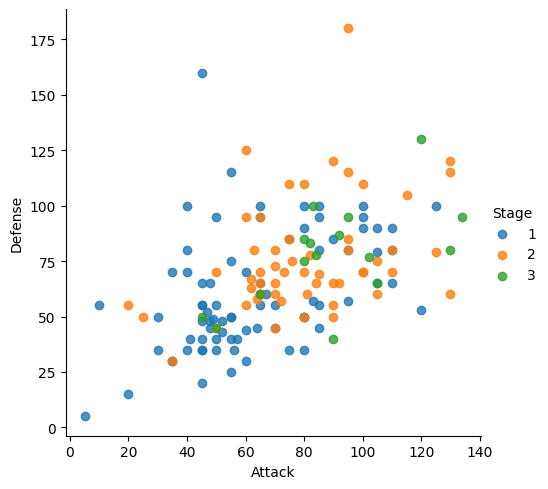

In [8]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

Looking better, but we can improve this scatter plot further. For example, perhaps we find the plot a bit cramped, and wish to expand our axes limits. Let’s see how we can do that…

Customizing with Matplotlib

Even though this is a Python Seaborn tutorial, we sometimes need to get closer to the underlying plotting logic. Remember, Seaborn is a high-level interface to Matplotlib. Seaborn will get you most of the way there, but you’ll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

    First, invoke your Seaborn plotting function as normal.
    Then, invoke Matplotlib’s customization functions. In this case, we’ll use its ylim() and xlim() functions.

Here’s our new scatter plot with expanded axes limits:

(0.0, 160.0)

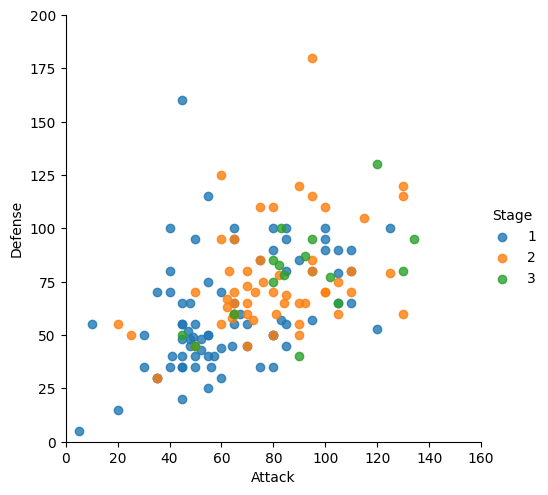

In [9]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, 200)
plt.xlim(0, 160)

For more information on Matplotlib’s customization functions, check out its documentation: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

The Role of Pandas

Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn’s plotting functions benefit from a base DataFrame that’s reasonably formatted.

For example, let’s say we wanted to make a box plot for our Pokémon’s combat stats (we’ll also run the code plt.figure(figsize=(9,6)) to make the plot larger and more legible):


<Axes: >

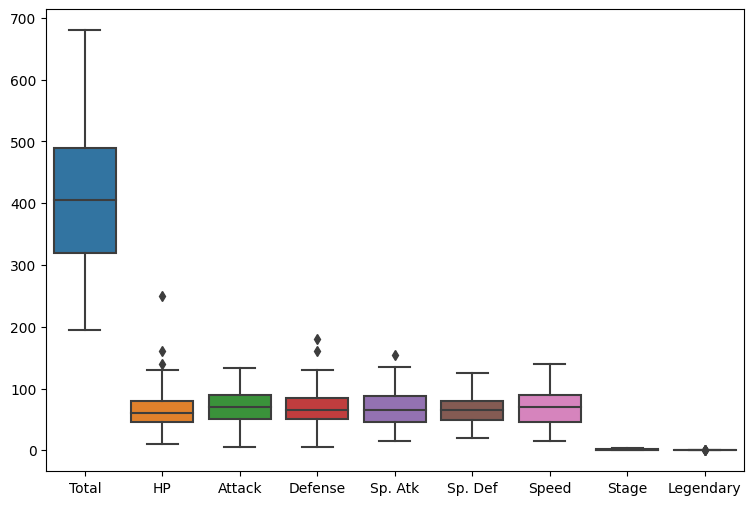

In [10]:
# Boxplot
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=df)

Well, that’s a reasonable start, but there are some columns we’d probably like to remove:

    We can remove the Total since we have individual stats.
    We can remove the Stage and Legendary columns because they aren’t combat stats.

In turns out that this isn’t easy to do within Seaborn alone. Instead, it’s much simpler to pre-format your DataFrame.

Let’s create a new DataFrame called stats_df that only keeps the stats columns:


<Axes: >

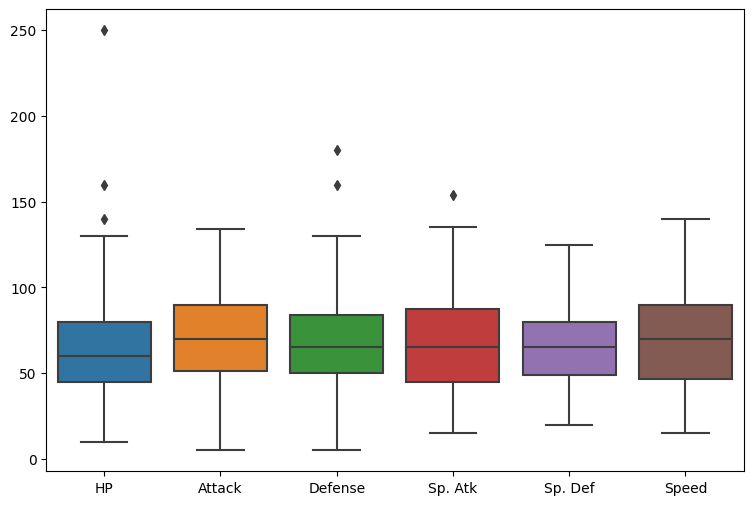

In [11]:
# Preprocess DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=stats_df)

It’s outside the scope of this tutorial to dive into Pandas, but here’s a handy Pandas cheat sheet: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Seaborn Themes

No Python Seaborn tutorial would be complete without touching on Seaborn’s styling themes. A huge advantage of Seaborn is that it comes with decent styles right out of the box. There are five preset themes, and the default one is called ‘darkgrid’.

Next, we’ll change the theme to ‘whitegrid’ while making a violin plot.

    Violin plots are useful alternatives to box plots.
    They show the distribution (through the thickness of the violin) instead of only the summary statistics.

For example, we can visualize the distribution of Attack by Pokémon’s primary type:

<Axes: xlabel='Type 1', ylabel='Attack'>

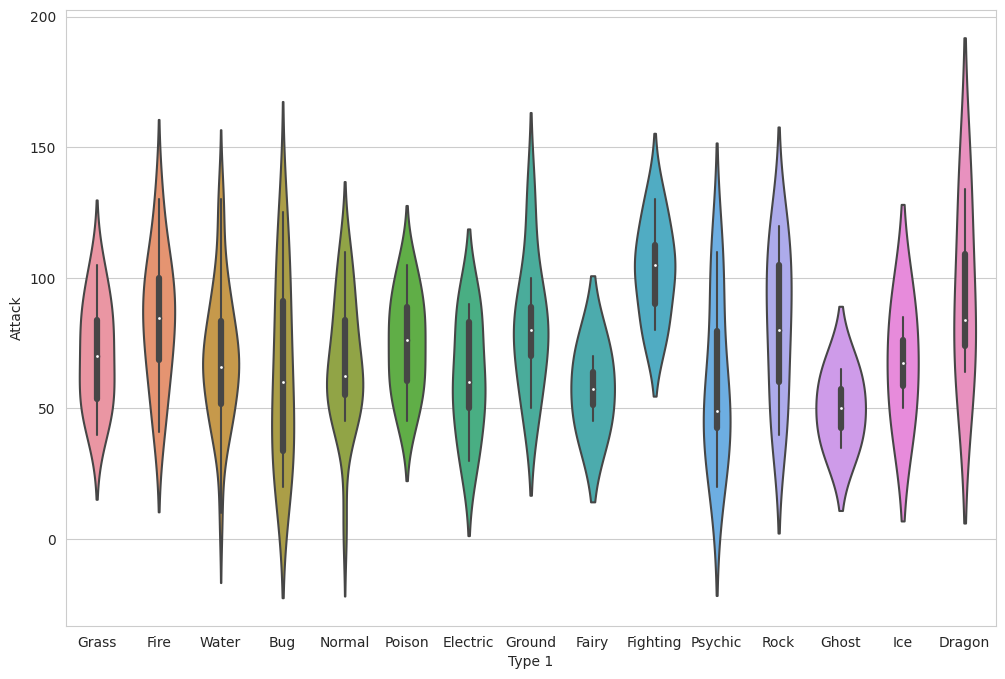

In [12]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

Color Palettes

Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Let’s use [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates) to help us create a new color palette:

In [15]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Wonderful. Now we can simply use the palette= argument to recolor our chart.

<Axes: xlabel='Type 1', ylabel='Attack'>

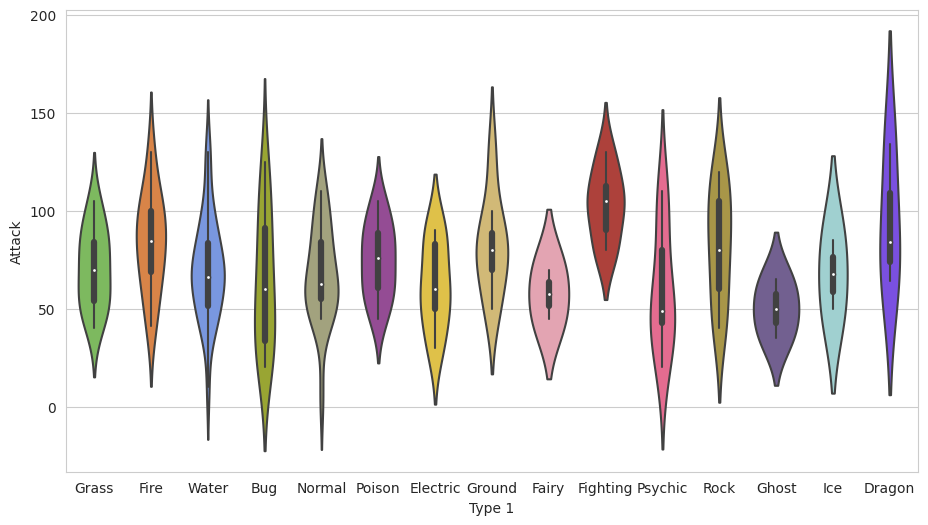

In [17]:
# Violin plot with Pokemon color palette
plt.figure(figsize=(11,6)) # Set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Much better!

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That’s where the swarm plot comes in. This visualization will show each point, while “stacking” those with similar values:

<ipython-input-18-7d1f600cdfd0>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Type 1', y='Attack', data=df,


<Axes: xlabel='Type 1', ylabel='Attack'>

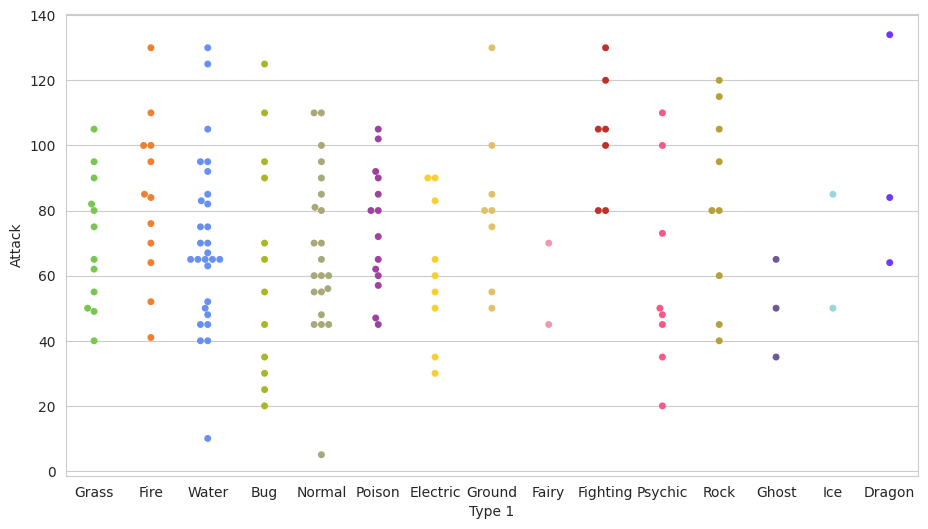

In [18]:
# Swarm plot with Pokemon color palette
plt.figure(figsize=(11,6)) # Set plot dimensions
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

That’s handy, but can’t we combine our swarm plot and the violin plot? After all, they display similar information, right?

The answer is yes:

Overlaying Plots

It’s pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here’s what we’ll do:

    First, we’ll make our figure larger using Matplotlib.
    Then, we’ll plot the violin plot. However, we’ll set inner=None to remove the bars inside the violins.
    Next, we’ll plot the swarm plot. This time, we’ll make the points black so they pop out more.
    Finally, we’ll set a title using Matplotlib.

Text(0.5, 1.0, 'Attack by Type')

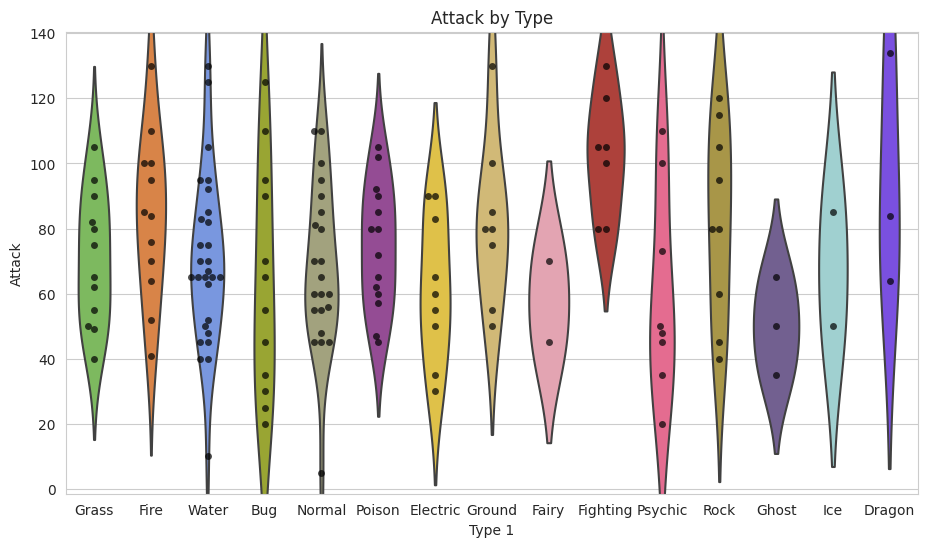

In [19]:
# Set figure size with matplotlib
plt.figure(figsize=(11,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

Awesome, now we have a pretty chart that tells us how Attack values are distributed across different Pokémon types. But what it we want to see all of the other stats as well?

Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart… we just have to do some data wrangling with Pandas beforehand.

Putting It All Together

Let’s conclude our Python Seaborn tutorial by bringing together everything we’ve covered to display all information elegantly in one plot.

First, here’s a reminder of our data format:

In [20]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to “melt” them into one column.

To do so, we’ll use Pandas’s melt() function. It takes 3 arguments:

    First, the DataFrame to melt.
    Second, ID variables to keep (Pandas will melt all of the other ones).
    Finally, a name for the new, melted variable.

Here’s the output:

In [21]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


All 6 of the stat columns have been “melted” into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it’s hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames…

In [23]:
print( stats_df.shape )
print( melted_df.shape )
# (151, 9)
# (906, 5)

(151, 9)
(906, 5)


…you’ll find that melted_df has 6 times the number of rows as stats_df.

Now we can make a swarm plot with melted_df.

    But this time, we’re going to set x='Stat' and y='value' so our swarms are separated by stat.
    Then, we’ll set hue='Type 1' to color our points by the Pokémon type.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Stat', ylabel='value'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 18.5% of the points cannot be placed; y

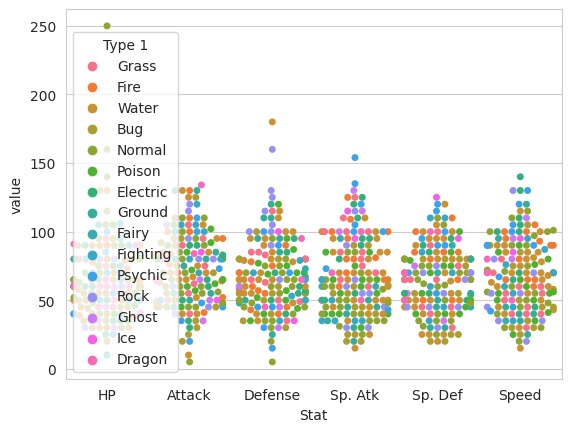

In [24]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

Finally, let’s make a few final tweaks for a more readable chart:

    Enlarge the plot.
    Separate points by hue using the argument dodge=True .
    Use our custom Pokemon color palette.
    Adjust the y-axis limits to end at 0.
    Place the legend to the right.

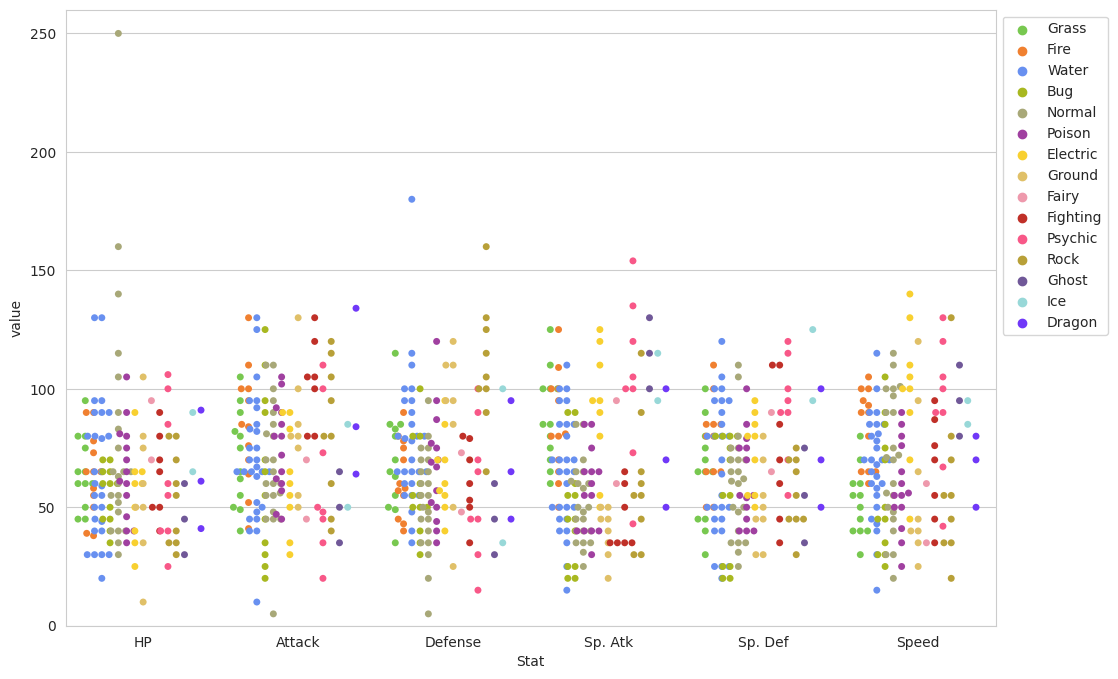

In [25]:
# 1. Enlarge the plot
plt.figure(figsize=(12,8))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

There we go!

*Side Note: If you get a warning like “UserWarning: 32.1% of the points cannot be placed…” it’s not a big deal for now. It’s simply telling you that Seaborn could not fit all of the points due to the plot size being too small. You can fix it either by making the points smaller or by increasing the plot dimensions.
Step 10: Pokédex (Mini-Gallery)

We’re going to conclude this tutorial with a few quick-fire data visualizations, just to give you a sense of what’s possible with Seaborn.

Heatmap

Heatmaps help you visualize matrix-like data.

<Axes: >

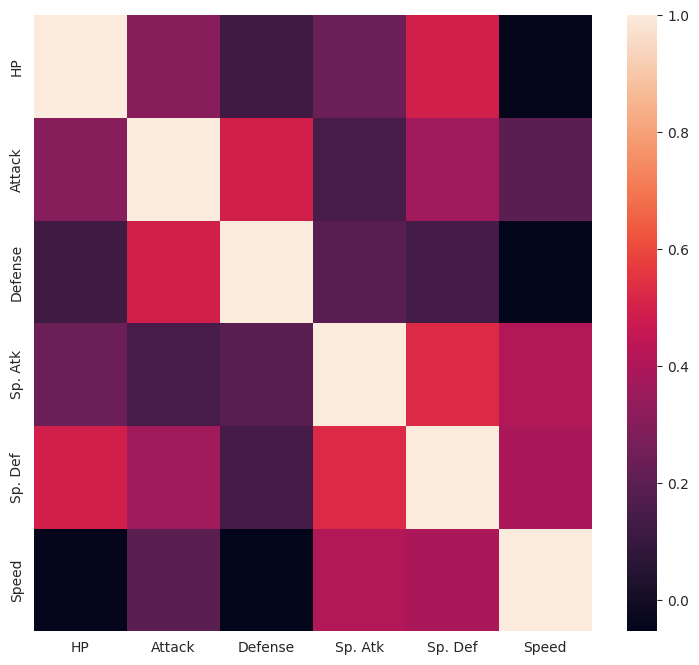

In [26]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)

Histogram

Histograms allow you to plot the distributions of numeric variables.

<Axes: xlabel='Attack', ylabel='Count'>

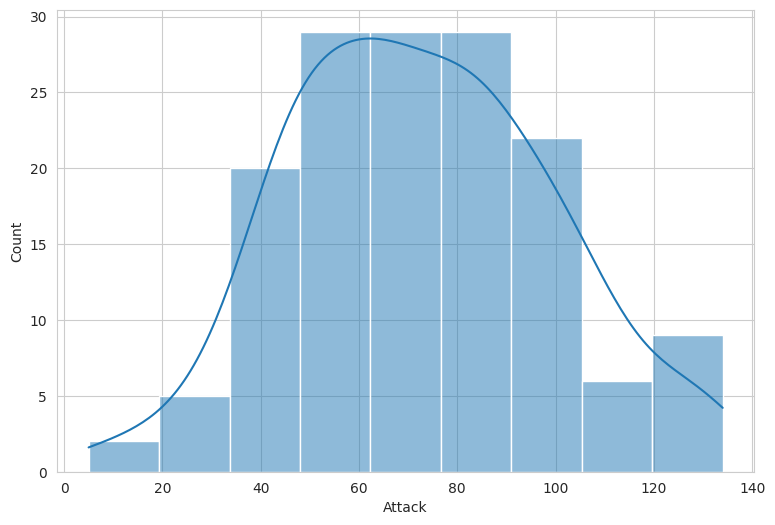

In [27]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(9,6))
sns.histplot(df, x='Attack',
             kde=True) # Plot the density curve too

Bar Plot

Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

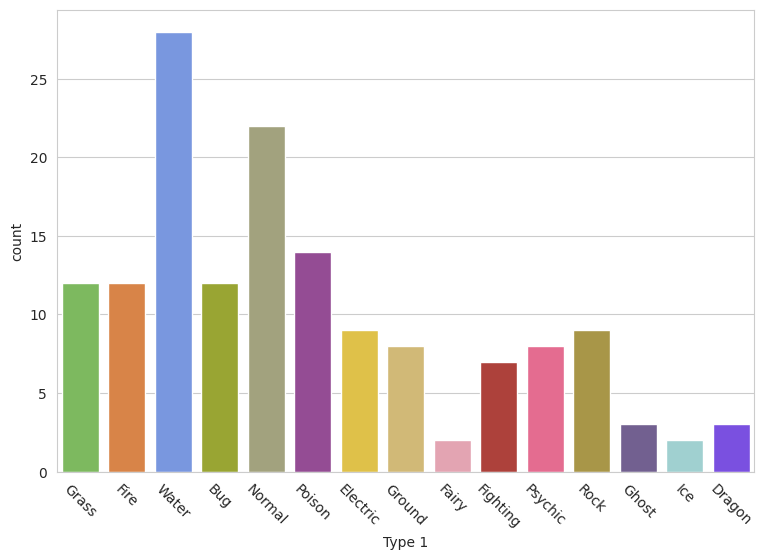

In [29]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(9,6))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

CatPlot (Categorical Plot)

CatPlots make it easy to separate plots by categorical classes.

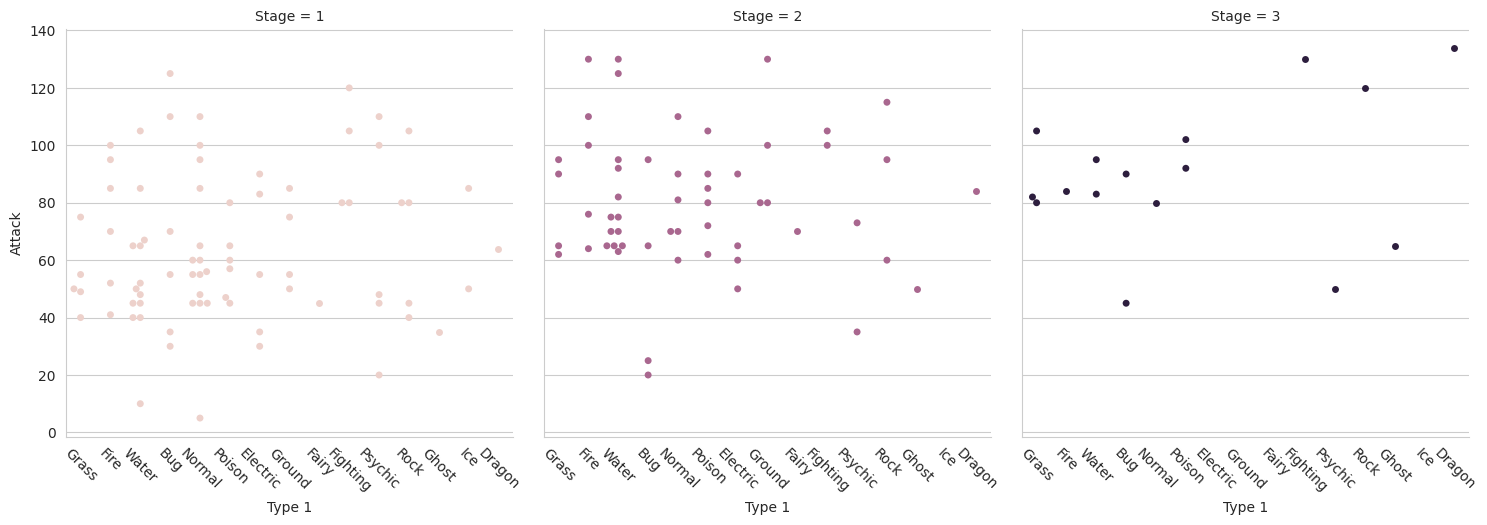

In [30]:
# Categorical Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45) 

Density Plot

Density plots display the distribution between two variables.

    Tip: Consider overlaying this with a scatter plot.

<Axes: xlabel='Attack', ylabel='Defense'>

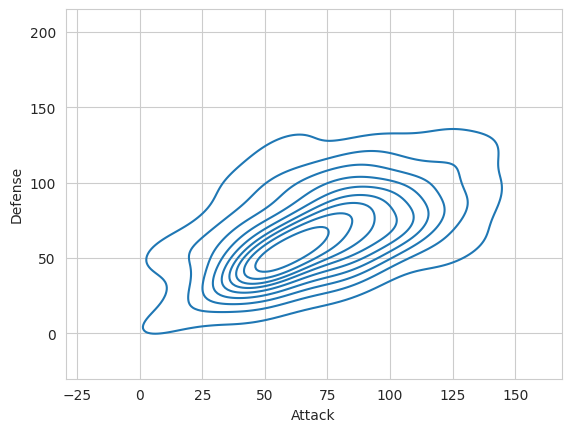

In [31]:
# Density Plot
sns.kdeplot(x='Attack', y='Defense', data=df)

Joint Distribution Plot

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

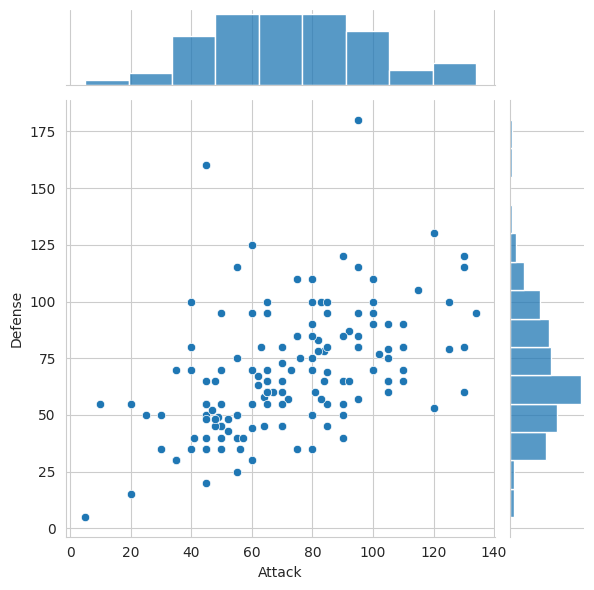

In [32]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)